<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from unicodedata import normalize
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans, MeanShift, AffinityPropagation

from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [ ]:
def normalize_word(word):
  """Normaliza palabras"""
  word = word.replace(' ', '_')
  find_guion = word.find('_')
  list_word = []
  if find_guion:
    list_word = [w for w in word.split('_') if w != '']
  else:
    list_word = word
  word = list(map(lambda x: x.lower(), list_word))
  word = [normalize('NFKD', c).encode('ASCII', 'ignore').decode() for c in word]
  word = "_".join(word)
  return word

def normalize_name_columns(columns):
  """Normaliza columnas"""
  columns = list(map(lambda x: normalize_word(x), columns))
  return columns


def generate_colors(paleta="Set1", n_colors=15):
  """Generador de colores"""
  cmap = sns.color_palette(paleta, n_colors).as_hex()
  list_camap = ListedColormap(cmap)
  return cmap, list_camap

def pie_circle(serie:pd.Series, paleta=None, figsize_x:int=7, figsize_y:int=7,fontsize=15,**kwards)->None:
  paleta = paleta if paleta !=None else generate_colors()[0]
  values = serie.value_counts().sort_index()
  names = values.index
  size = values.values
  fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de anillo {kwards["title"]}', fontsize=fontsize)
  my_circle = plt.Circle( (0,0), 0.7, color='white')
  plt.pie(size, labels=names, autopct="%0.1f %%", wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors = paleta)
  p = plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

paleta = {
    0: 'blue',
    1: 'red',
    2: 'orange',
    3: 'green',
    4: 'pink',
    5: 'black',
    6: 'gray',
    7: 'Cyan',
}
paleta = paleta.values()
print(paleta)



def plot_bar(data, paleta = None, figsize_x=8,figsize_y=5,fontsize=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  paleta = paleta if paleta !=None else generate_colors()[0]
  v = kwards
  ejeX = v['ejeX']


  fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

  if type(v['ejeX']) == str:
    sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
  else:
    ejeX = v['ejeX'][0]
    sns.countplot(x=ejeX,hue=v['ejeX'][1], data=data, ax = ax, palette=paleta)


  ax.set_ylabel(v['ejey'], size = 12)
  ax.set_xlabel(ejeX, size=fontsize-3)
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
  for p in ax.patches:
    try:
      height = int(p.get_height())
      ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
    except:
      pass



def plot_select_params(best_score, best_x_param, scores, x_params, **kwards):
  fig, ax = plt.subplots(1, 1, figsize=(8, 5))
  ax.plot(x_params, scores)
  ax.plot(best_x_param, best_score, marker='o', color='r')
  ax.axvline(x=best_x_param,  color='r')
  ax.set_title(kwards['title'])
  ax.set_xlabel(kwards['xlabel'])
  ax.set_ylabel(kwards['ylabel'])


def silhouette_select_cluster(model, clusters, data, **kwards):
  """Metodo silhouette"""
  range_n_clusters = range(clusters[0], clusters[1])
  valores_medios_silhouette = {}
  for k in range_n_clusters:
    model.n_clusters = k
    model.fit(data)
    y_predict = model.predict(data)
    silhouette_avg = silhouette_score(data, y_predict)
    valores_medios_silhouette[k] = silhouette_avg

  x = list(range_n_clusters)
  y = list(valores_medios_silhouette.values())
  kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")

  best_score = valores_medios_silhouette[kneedle.elbow]
  best_cluster = kneedle.elbow

  res_data = {
      'score': best_score,
      'cluster': best_cluster,
  }
  plot_select_params(best_score, best_cluster, y, range_n_clusters,
                        title = f'Evolución de media de los índices silhouette {kwards["name_model"]}',
                        ylabel = 'Media índices silhouette',
                        xlabel = 'Numero clusters')

  return best_cluster, best_score
# silhouette_select_cluster(fcm, (2,5), cluster_df, name_model = 'FUzzy')

dict_values(['blue', 'red', 'orange', 'green', 'pink', 'black', 'gray', 'Cyan'])


In [ ]:
data = pd.read_csv('./data/Mineria_-_Materiales_extraidos_en_Colombia_2012_a_2017.csv')

**Estandar en nombres**


In [ ]:
columns = normalize_name_columns(data.columns)
data.columns = columns

In [ ]:
data.head()

,municipio_productor,departamento,recurso_natural,nombre_del_proyecto,ano_produccion,trimestre,unidad_medida,tipo_contraprestacion,valor_contraprestacion,cantidad_produccion
0,Medellin,Antioquia,ARCILLAS,PRODUCTORES,2018,Trimestre 4,TONELADAS,REGALIAS,614258.0,0.00
1,Medellin,Antioquia,ARCILLAS CERAMICAS,PRODUCTORES,2014,Trimestre 4,TONELADAS,REGALIAS,2036781.0,14381.00
2,Medellin,Antioquia,ARCILLAS FERRUGINOSAS,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIAS,836927.0,16308.00
3,Medellin,Antioquia,ARCILLAS MISCELANEAS,PRODUCTORES,2019,Trimestre 1,TONELADAS,REGALIAS,5763839.0,33347.50
4,Medellin,Antioquia,ARCILLAS MISCELANEAS,PRODUCTORES,2019,Trimestre 2,TONELADAS,REGALIAS,5802546.0,32484.78


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52312 entries, 0 to 52311
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   municipio_productor     52312 non-null  object 
 1   departamento            52312 non-null  object 
 2   recurso_natural         52312 non-null  object 
 3   nombre_del_proyecto     52312 non-null  object 
 4   ano_produccion          52312 non-null  int64  
 5   trimestre               52312 non-null  object 
 6   unidad_medida           52312 non-null  object 
 7   tipo_contraprestacion   52312 non-null  object 
 8   valor_contraprestacion  52312 non-null  float64
 9   cantidad_produccion     52312 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


- No hay valores nulos explicitos

In [ ]:
data['ano_produccion'].value_counts()

2013    5543
2017    5303
2016    5252
2018    5238
2019    5058
2014    4825
2015    4769
2012    4278
2020    3872
2021    3850
2022    3586
2023     738
Name: ano_produccion, dtype: int64

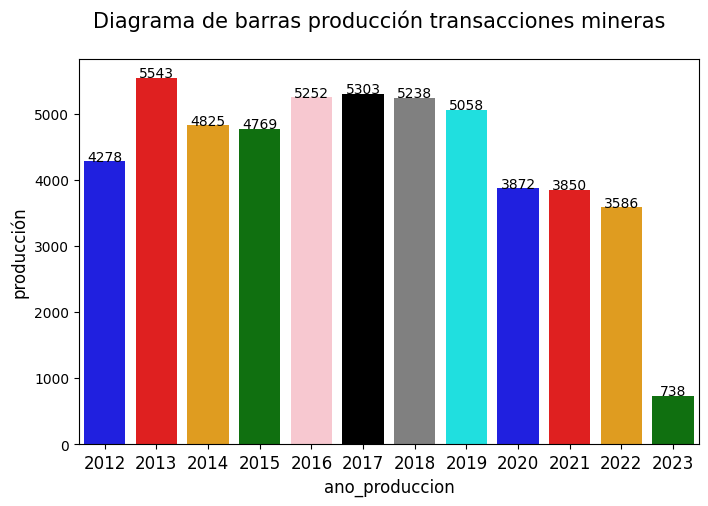

In [ ]:
plot_bar(data, paleta=paleta, ejeX='ano_produccion',ejey='producción',title='producción transacciones mineras')


Atributo o factor a segmentar: **nombre_del_proyecto**

In [ ]:
data_muestra = data[data['ano_produccion'] == 2013]

In [ ]:
data_muestra

,municipio_productor,departamento,recurso_natural,nombre_del_proyecto,ano_produccion,trimestre,unidad_medida,tipo_contraprestacion,valor_contraprestacion,cantidad_produccion
7,Medellin,Antioquia,ARCILLAS MISCELANEAS,PRODUCTORES,2013,Trimestre 4,TONELADAS,REGALIAS,1.328642e+07,93463.60000
35,Medellin,Antioquia,ARENA DE CANTERA,PRODUCTORES,2013,Trimestre 1,METROS CUBICOS,REGALIAS,1.428743e+06,14436.12203
38,Medellin,Antioquia,ARENA DE CANTERA,PRODUCTORES,2013,Trimestre 2,METROS CUBICOS,REGALIAS,1.376957e+06,13912.87405
40,Medellin,Antioquia,ARENA DE CANTERA,PRODUCTORES,2013,Trimestre 3,METROS CUBICOS,REGALIAS,2.613617e+06,26408.17300
43,Medellin,Antioquia,ARENA DE CANTERA,PRODUCTORES,2013,Trimestre 4,METROS CUBICOS,REGALIAS,1.956070e+06,19764.00000
...,...,...,...,...,...,...,...,...,...,...
52268,Puerto Carreño,Vichada,ARENA DE RIO,PRODUCTORES,2013,Trimestre 4,METROS CUBICOS,REGALIAS,6.755196e+04,400.00000
52285,Puerto Carreño,Vichada,GRAVAS,PRODUCTORES,2013,Trimestre 4,METROS CUBICOS,REGALIAS,3.000000e+04,100.00000
52301,La Primavera,Vichada,ARENAS,PRODUCTORES,2013,Trimestre 4,METROS CUBICOS,REGALIAS,3.781140e+05,0.00000
52302,La Primavera,Vichada,GRAVAS,PRODUCTORES,2013,Trimestre 4,METROS CUBICOS,REGALIAS,1.812540e+05,0.00000


**Agrupaciones**

In [ ]:
def first_group(data):
  function_dictionary = {'valor_contraprestacion': ['sum', 'count'], 'cantidad_produccion':['sum']}
  first_group = data.groupby(['municipio_productor', 'departamento', 'ano_produccion', 'trimestre']).aggregate(function_dictionary)
  first_group.columns = ['valor_contraprestacion_sum', 'valor_contraprestacion_count', 'cantidad_produccion_sum']
  return first_group

In [ ]:
def scond_group(data):
  function_dictionary2 = {'valor_contraprestacion_sum': ['sum', 'mean'], 'valor_contraprestacion_count':  ['sum', 'mean', 'count'], 'cantidad_produccion_sum':['sum', 'mean']}
  secont_group = data.groupby(level=['municipio_productor']).aggregate(function_dictionary2)
  secont_group.columns = ['valor_contraprestacion_total', 'valor_prom_contraprestacion_trim_activo', 'ntx_totales', 'ntx_prom_trim_activo', 'trimestre_actividad', 'cantidad_produccion_total', 'cantidad_produccion_prom_trim_activo']
  transaccion_valor = secont_group.reset_index()
  return transaccion_valor

In [ ]:
def third_group(data):
  function_dictionary3 = {'valor_contraprestacion': ['sum', 'count'], 'cantidad_produccion': ['sum']}
  tirth_group = data.groupby(['municipio_productor', 'departamento', 'ano_produccion', 'trimestre', 'recurso_natural']).aggregate(function_dictionary3)
  tirth_group.columns = ['valor_contraprestacion_sum', 'valor_contraprestacion_count', 'cantidad_produccion_sum']
  tirth_group
  return tirth_group

In [ ]:
def four_group(data):
  function_dictionary4 = {'valor_contraprestacion_sum': ['sum', 'mean'], 'cantidad_produccion_sum': ['sum', 'mean'], 'valor_contraprestacion_count': ['sum', 'mean', 'count']}
  transaccion_recurso = data.groupby(level=['municipio_productor', 'recurso_natural']).aggregate(function_dictionary4)
  transaccion_recurso = transaccion_recurso.reset_index()
  transaccion_recurso.columns = ['municipio_productor','recurso_natural', 'valor_contraprestacion_recurso', 'valor_prom_contraprestacion_trim_acti_recurso','cantidad_produccion_recurso', 'cantidad_produccion_prom_trim_acti_recurso', 'ntx_totales_trim_activi_recurso', 'ntx_prom_trim_acti_recurso', 'trimestre_activos_recurso']
  return transaccion_recurso

In [ ]:
first_group_data = first_group(data_muestra)
first_group_data

valor_contraprestacion_sum  \
municipio_productor departamento       ano_produccion trimestre                                 
Abejorral           Antioquia          2013           Trimestre 1                1.260665e+07   
                                                      Trimestre 3                2.735440e+06   
                                                      Trimestre 4                4.272560e+07   
Abrego              Norte de Santander 2013           Trimestre 1                7.271650e+05   
                                                      Trimestre 2                5.331540e+05   
...                                                                                       ...   
Zarzal              Valle del Cauca    2013           Trimestre 2                7.109078e+05   
Zipaquira           Cundinamarca       2013           Trimestre 1                1.276520e+08   
                                                      Trimestre 2                1.011076e+09   
                                                      Trimestre 3                1.086780e+08   
                                                      Trimestre 4                1.766055e+08   

                                                                   valor_contraprestacion_count  \
municipio_productor departamento       ano_produccion trimestre                                   
Abejorral           Antioquia          2013           Trimestre 1                             3   
                                                      Trimestre 3                             2   
                                                      Trimestre 4                             3   
Abrego              Norte de Santander 2013           Trimestre 1                             1   
                                                      Trimestre 2                             1   
...                                                                                         ...   
Zarzal              Valle del Cauca    2013           Trimestre 2                             1   
Zipaquira           Cundinamarca       2013           Trimestre 1                             4   
                                                      Trimestre 2                             4   
                                                      Trimestre 3                             3   
                                                      Trimestre 4                             3   

                                                                   cantidad_produccion_sum  
municipio_productor departamento       ano_produccion trimestre                             
Abejorral           Antioquia          2013           Trimestre 1             94378.450000  
                                                      Trimestre 3              1500.000000  
                                                      Trimestre 4            321173.050000  
Abrego              Norte de Santander 2013           Trimestre 1              6537.000000  
                                                      Trimestre 2              3157.000000  
...                                                                                    ...  
Zarzal              Valle del Cauca    2013           Trimestre 2              5000.054825  
Zipaquira           Cundinamarca       2013           Trimestre 1             20036.764016  
                                                      Trimestre 2              7556.730000  
                                                      Trimestre 3             18550.290000  
                                                      Trimestre 4             36192.090865  

[1934 rows x 3 columns]

**Segunda Agrupacion**

In [ ]:
transaccion_valor = scond_group(first_group_data)
transaccion_valor

,municipio_productor,valor_contraprestacion_total,valor_prom_contraprestacion_trim_activo,ntx_totales,ntx_prom_trim_activo,trimestre_actividad,cantidad_produccion_total,cantidad_produccion_prom_trim_activo
0,Abejorral,5.806770e+07,1.935590e+07,8,2.666667,3,4.170515e+05,139017.166667
1,Abrego,3.089795e+06,7.724488e+05,4,1.000000,4,2.052700e+04,5131.750000
2,Abriaqui,2.253532e+07,5.633830e+06,24,6.000000,4,1.017852e+04,2544.630250
3,Acacias,3.524032e+07,8.810079e+06,10,2.500000,4,5.022237e+05,125555.914090
4,Agrado,7.250886e+06,7.250886e+06,2,2.000000,1,4.551400e+04,45514.000000
...,...,...,...,...,...,...,...,...
640,Yumbo,4.050383e+08,1.012596e+08,21,5.250000,4,3.015780e+06,753945.036741
641,Zapatoca,6.155833e+06,1.538958e+06,4,1.000000,4,7.444965e+03,1861.241133
642,Zaragoza,2.704269e+09,6.760673e+08,24,6.000000,4,2.701234e+06,675308.621070
643,Zarzal,1.421807e+06,7.109034e+05,2,1.000000,2,1.000005e+04,5000.024220


**Tercera Agrupacion**

In [ ]:
third_group_data = third_group(data_muestra)
third_group_data

valor_contraprestacion_sum  \
municipio_productor departamento ano_produccion trimestre   recurso_natural                                  
Abejorral           Antioquia    2013           Trimestre 1 CALIZAS                           1.178432e+07   
                                                            MARMOL                            2.190990e+05   
                                                            ORO                               6.032368e+05   
                                                Trimestre 3 ORO                               2.719465e+06   
                                                            PLATA                             1.597546e+04   
...                                                                                                    ...   
Zipaquira           Cundinamarca 2013           Trimestre 3 CARBON                            5.874346e+07   
                                                            SAL                               4.989103e+07   
                                                Trimestre 4 ARCILLAS CERAMICAS                5.482312e+04   
                                                            CARBON                            1.458408e+08   
                                                            SAL                               3.070980e+07   

                                                                                valor_contraprestacion_count  \
municipio_productor departamento ano_produccion trimestre   recurso_natural                                    
Abejorral           Antioquia    2013           Trimestre 1 CALIZAS                                        1   
                                                            MARMOL                                         1   
                                                            ORO                                            1   
                                                Trimestre 3 ORO                                            1   
                                                            PLATA                                          1   
...                                                                                                      ...   
Zipaquira           Cundinamarca 2013           Trimestre 3 CARBON                                         1   
                                                            SAL                                            1   
                                                Trimestre 4 ARCILLAS CERAMICAS                             1   
                                                            CARBON                                         1   
                                                            SAL                                            1   

                                                                                cantidad_produccion_sum  
municipio_productor departamento ano_produccion trimestre   recurso_natural                              
Abejorral           Antioquia    2013           Trimestre 1 CALIZAS                        92644.000000  
                                                            MARMOL                          1541.000000  
                                                            ORO                              193.450000  
                                                Trimestre 3 ORO                             1080.000000  
                                                            PLATA                            420.000000  
...                                                                                                 ...  
Zipaquira           Cundinamarca 2013           Trimestre 3 CARBON                         10844.340000  
                                                            SAL                             7389.950000  
                                                Trimestre 4 ARCILLAS CERAMICAS               398.000000  
                          

**Cuarto Agrupacion**

In [ ]:
transaccion_recurso = four_group(third_group_data)
transaccion_recurso

,municipio_productor,recurso_natural,valor_contraprestacion_recurso,valor_prom_contraprestacion_trim_acti_recurso,cantidad_produccion_recurso,cantidad_produccion_prom_trim_acti_recurso,ntx_totales_trim_activi_recurso,ntx_prom_trim_acti_recurso,trimestre_activos_recurso
0,Abejorral,ARCILLAS CERAMICAS,6.446232e+06,6.446232e+06,4.680000e+04,46800.000000,1,1.0,1
1,Abejorral,CALIZAS,4.670475e+07,2.335238e+07,3.664850e+05,183242.500000,2,1.0,2
2,Abejorral,MARMOL,2.190990e+05,2.190990e+05,1.541000e+03,1541.000000,1,1.0,1
3,Abejorral,ORO,4.681640e+06,1.560547e+06,1.805500e+03,601.833333,3,1.0,3
4,Abejorral,PLATA,1.597546e+04,1.597546e+04,4.200000e+02,420.000000,1,1.0,1
...,...,...,...,...,...,...,...,...,...
1782,Zaragoza,PLATA,3.714475e+07,9.286189e+06,1.460180e+06,365044.955500,12,3.0,4
1783,Zarzal,ARCILLAS MISCELANEAS,1.421807e+06,7.109034e+05,1.000005e+04,5000.024220,2,1.0,2
1784,Zipaquira,ARCILLAS CERAMICAS,1.777661e+05,4.444153e+04,1.291000e+03,322.750000,4,1.0,4
1785,Zipaquira,CARBON,2.949292e+08,7.373230e+07,5.471168e+04,13677.921250,4,1.0,4


In [ ]:
columns = [
    'valor_contraprestacion_recurso',
    'valor_prom_contraprestacion_trim_acti_recurso',
    'cantidad_produccion_recurso',
    'cantidad_produccion_prom_trim_acti_recurso',
    'ntx_totales_trim_activi_recurso',
    'ntx_prom_trim_acti_recurso',
    'trimestre_activos_recurso'
  ]

In [ ]:
def pivoteador(data, columns):
  data_return = pd.DataFrame()
  for i in columns:
    valor_total_recurso = data.pivot(index='municipio_productor', columns='recurso_natural', values=i).reset_index()
    valor_total_recurso = valor_total_recurso.fillna(0)
    columns_recurso = valor_total_recurso.columns
    columns_recurso = [f'{i}({c})' for c in columns_recurso]
    valor_total_recurso.columns = ['municipio_productor']+columns_recurso[1:]
    if data_return.empty:
      data_return = valor_total_recurso
    else:
      data_return = pd.merge(data_return, valor_total_recurso, on = 'municipio_productor', how="inner")
  return data_return

In [ ]:
pivoteador(transaccion_recurso, columns)

,municipio_productor,valor_contraprestacion_recurso(ARCILLAS),valor_contraprestacion_recurso(ARCILLAS BENTONITICA),valor_contraprestacion_recurso(ARCILLAS CAOLINITICA),valor_contraprestacion_recurso(ARCILLAS CERAMICAS),valor_contraprestacion_recurso(ARCILLAS FERRUGINOSAS),valor_contraprestacion_recurso(ARCILLAS MISCELANEAS),valor_contraprestacion_recurso(ARCILLAS REFRACTARIAS),valor_contraprestacion_recurso(ARENA DE CANTERA),valor_contraprestacion_recurso(ARENA DE RIO),...,trimestre_activos_recurso(RECEBO),trimestre_activos_recurso(ROCA CORALINA (BLOQUE MAYOR O IGUAL A 1 M3)),trimestre_activos_recurso(ROCA FOSFORICA),trimestre_activos_recurso(SAL),trimestre_activos_recurso(SERPENTINA (BLOQUE MAYOR O IGUAL A 1 M3)),trimestre_activos_recurso(SERPENTINA (BLOQUE MENOR A 1 M3)),trimestre_activos_recurso(SERPENTINA EN RAJON),trimestre_activos_recurso(TALCO),trimestre_activos_recurso(TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAYOR O IGUAL A 1 M3),trimestre_activos_recurso(YESO)
0,Abejorral,0.0,0.0,0.0,6.446232e+06,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abrego,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abriaqui,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acacias,0.0,0.0,0.0,0.000000e+00,0.0,4.423002e+06,0.0,50902.52111,8.445885e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agrado,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Yumbo,0.0,0.0,0.0,0.000000e+00,0.0,2.902331e+05,0.0,0.00000,1.361114e+06,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Zapatoca,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
642,Zaragoza,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,Zarzal,0.0,0.0,0.0,0.000000e+00,0.0,1.421807e+06,0.0,0.00000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Constantes**
---

In [ ]:
random_state = 12354

# **Modelado**
---

In [ ]:
from sklearn.cluster import KMeans, BisectingKMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
transaccion_valor

,municipio_productor,valor_contraprestacion_total,valor_prom_contraprestacion_trim_activo,ntx_totales,ntx_prom_trim_activo,trimestre_actividad,cantidad_produccion_total,cantidad_produccion_prom_trim_activo
0,Abejorral,5.806770e+07,1.935590e+07,8,2.666667,3,4.170515e+05,139017.166667
1,Abrego,3.089795e+06,7.724488e+05,4,1.000000,4,2.052700e+04,5131.750000
2,Abriaqui,2.253532e+07,5.633830e+06,24,6.000000,4,1.017852e+04,2544.630250
3,Acacias,3.524032e+07,8.810079e+06,10,2.500000,4,5.022237e+05,125555.914090
4,Agrado,7.250886e+06,7.250886e+06,2,2.000000,1,4.551400e+04,45514.000000
...,...,...,...,...,...,...,...,...
640,Yumbo,4.050383e+08,1.012596e+08,21,5.250000,4,3.015780e+06,753945.036741
641,Zapatoca,6.155833e+06,1.538958e+06,4,1.000000,4,7.444965e+03,1861.241133
642,Zaragoza,2.704269e+09,6.760673e+08,24,6.000000,4,2.701234e+06,675308.621070
643,Zarzal,1.421807e+06,7.109034e+05,2,1.000000,2,1.000005e+04,5000.024220


In [ ]:
data_df = transaccion_valor[["valor_contraprestacion_total",
                             "valor_prom_contraprestacion_trim_activo",
                             "ntx_totales",	"ntx_prom_trim_activo",
                             "trimestre_actividad"]]

**Extandarización**

In [ ]:
#estimator = StandardScaler()
estimator = MinMaxScaler()
data_standar = estimator.fit_transform(data_df)

# **Kmeans**
---

(2, 0.6816663955915521)

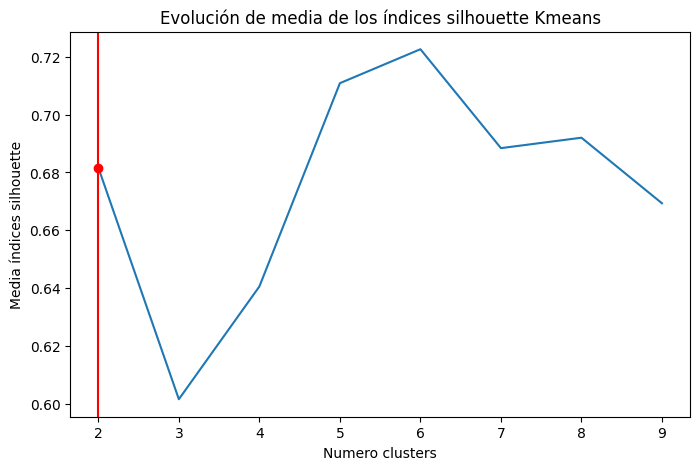

In [ ]:
kmeans = KMeans(init='k-means++', n_init=10, max_iter=500, random_state=random_state)
silhouette_select_cluster(kmeans, (2,10), data_standar, name_model = 'Kmeans')

In [ ]:
model_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=500,
                      random_state = random_state)
model_kmeans.fit(data_standar)
data_df['segmento'] = model_kmeans.predict(data_standar)

<ipython-input-29-e58861c5deb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['segmento'] = model_kmeans.predict(data_standar)


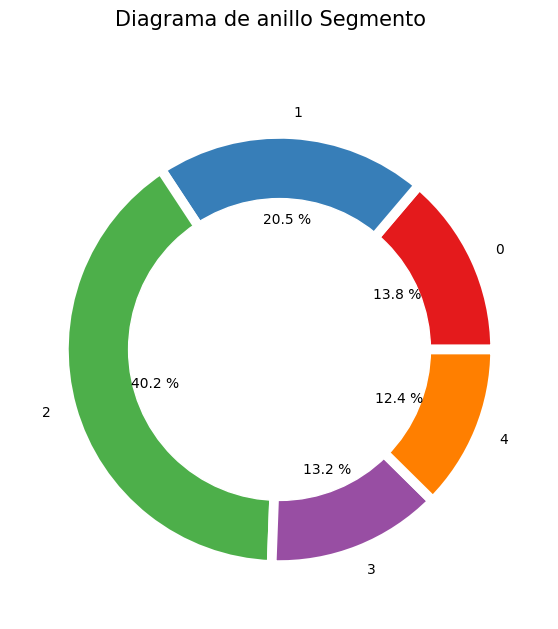

In [ ]:
pie_circle(data_df['segmento'], paleta=None, title='Segmento')

# BisekKamenas
---

In [ ]:
bisectingKMeans = BisectingKMeans(init='random', n_init=1,
                                  random_state=random_state, max_iter=300,
                                  bisecting_strategy='biggest_inertia')


(2, 0.6816663955915521)

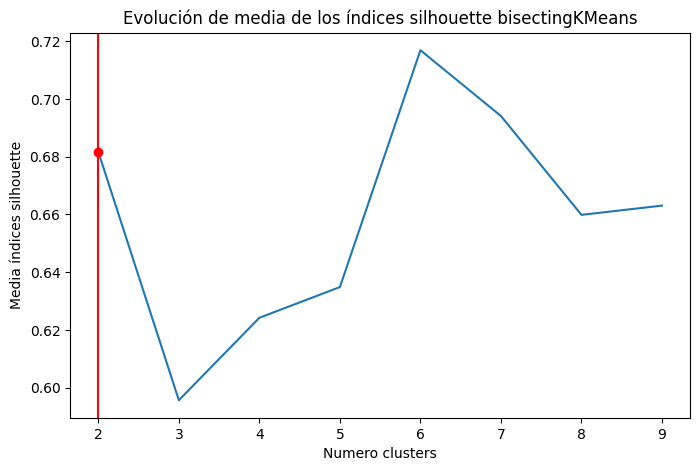

In [ ]:
silhouette_select_cluster(bisectingKMeans, (2,10), data_standar,
                          name_model = 'bisectingKMeans')

In [ ]:
modelbisectingKMeans = BisectingKMeans(n_clusters=4, init='random', n_init=1,
                                  random_state=random_state, max_iter=300,
                                  bisecting_strategy='biggest_inertia')
modelbisectingKMeans.fit(data_standar)
data_df['segmento'] = modelbisectingKMeans.predict(data_standar)


<ipython-input-33-2e1c85600ec0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['segmento'] = modelbisectingKMeans.predict(data_standar)


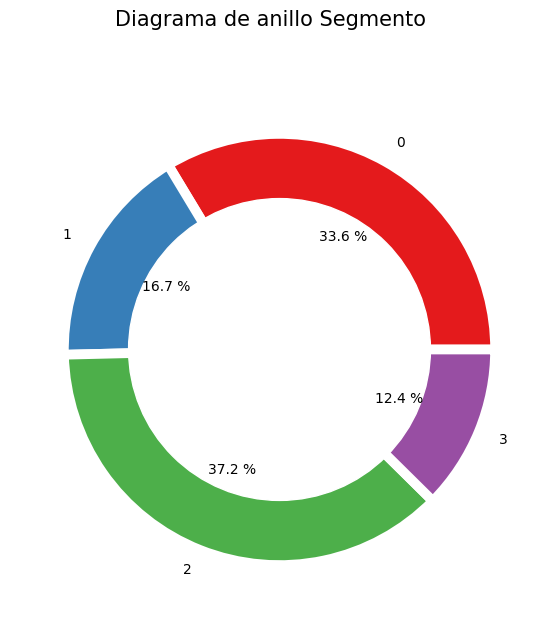

In [ ]:
pie_circle(data_df['segmento'], paleta=None, title='Segmento')

**AffinityPropagation**
---
Este fallara por la cantidad de registros y por que le cuesta converger

In [ ]:
affinityPropagation = AffinityPropagation(damping=0.95, max_iter=500, convergence_iter=800000, copy=True, preference=None, affinity='euclidean', verbose=False, random_state=random_state)

In [ ]:
affinityPropagation.fit(data_standar)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation(convergence_iter=800000, damping=0.95, max_iter=500,
                    random_state=12354)

In [ ]:
data_df['segmento'] = affinityPropagation.predict(data_standar)

<ipython-input-118-58dc043dd231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['segmento'] = affinityPropagation.predict(data_standar)


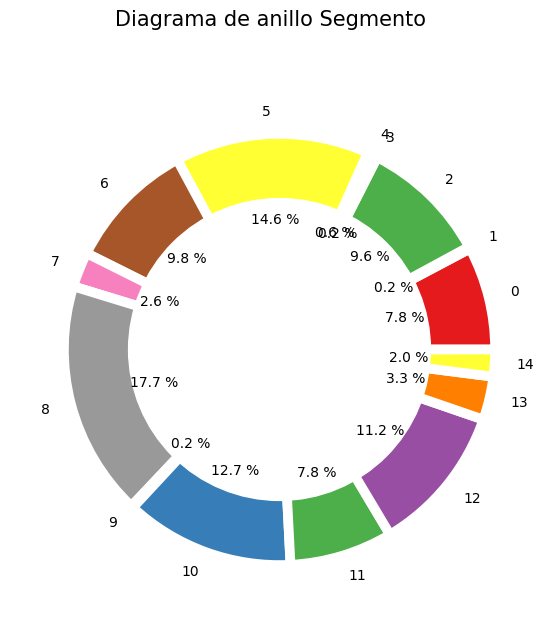

In [ ]:
pie_circle(data_df['segmento'], paleta=None, title='Segmento')